<a href="https://colab.research.google.com/github/SarahAlhabib/Cifar10Classifier/blob/main/problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:

model = keras.Sequential()

model.add(keras.layers.Conv2D(64, 3, input_shape=(32,32,3), activation='relu'))
model.add(keras.layers.MaxPool2D())


model.add(keras.layers.Conv2D(128, 3, activation='relu'))
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D())


model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, 3, activation='relu', kernel_regularizer=keras.regularizers.l1(0.01), activity_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.MaxPool2D()) 

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,'relu'))
model.add(keras.layers.Dense(32,'relu'))
model.add(keras.layers.Dense(10,'softmax'))

model.summary()

opt = keras.optimizers.Adam(lr=0.0001, decay=0.0)
model.compile(loss = 'categorical_crossentropy', optimizer=opt,  metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=5 ,epochs=80)

model.save('cifar10model.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 128)        

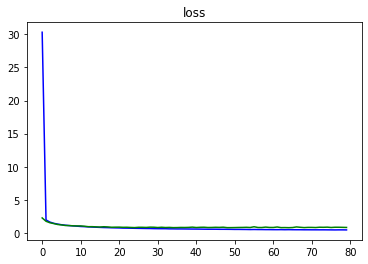

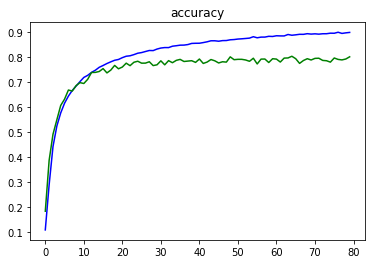

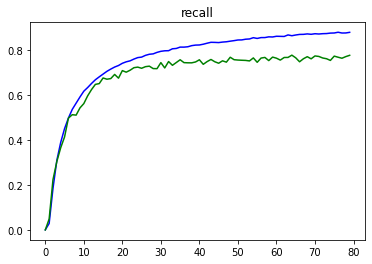

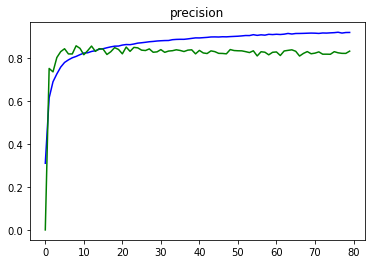

313/313 [==============================] - 1s 4ms/step - loss: 0.8114 - accuracy: 0.8014 - recall_1: 0.7784 - precision_1: 0.8322


In [ ]:
plt.plot(history.history['loss'],color="blue")
plt.plot(history.history['val_loss'],color="green")
plt.title("loss")
plt.show()

plt.plot(history.history['accuracy'],color="blue")
plt.plot(history.history['val_accuracy'],color="green")
plt.title("accuracy")
plt.show()

plt.plot(history.history['recall_1'],color="blue")
plt.plot(history.history['val_recall_1'],color="green")
plt.title("recall")
plt.show()

plt.plot(history.history['precision_1'],color="blue")
plt.plot(history.history['val_precision_1'],color="green")
plt.title("precision")
plt.show()

prediction = model.predict(x_test)
score = model.evaluate(x_test,y_test)

